# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    #https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={We}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    # loop through each city
#for city in cities:
    
    # create search query, make request and sotre in JSON
#     query = city_url 
#     response = requests.get(query)
#     response_json =response.json()
    
    
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
    # If an error is experienced, skip the city
    except:
        print("City '" + city.title() + "' not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ayan
Processing Record 2 of Set 1 | shingu
Processing Record 3 of Set 1 | deputatskiy
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | shelburne
Processing Record 6 of Set 1 | belushya guba
City 'Belushya Guba' not found. Skipping...
Processing Record 7 of Set 1 | morondava
Processing Record 8 of Set 1 | farmington
Processing Record 9 of Set 1 | bathsheba
Processing Record 10 of Set 1 | mudgee
Processing Record 11 of Set 1 | ambilobe
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | olafsvik
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | jiayuguan
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | mersing
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | santa elena
Processing Record 22 of Set 1 | gewan

Processing Record 33 of Set 4 | avera
Processing Record 34 of Set 4 | port alfred
Processing Record 35 of Set 4 | gajendragarh
Processing Record 36 of Set 4 | bambous virieux
Processing Record 37 of Set 4 | santa fe
Processing Record 38 of Set 4 | hobyo
Processing Record 39 of Set 4 | san juan
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | rosetta
Processing Record 42 of Set 4 | sokoni
Processing Record 43 of Set 4 | guarapari
Processing Record 44 of Set 4 | manyoni
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | katsuura
Processing Record 47 of Set 4 | ostrov
Processing Record 48 of Set 4 | maningrida
Processing Record 49 of Set 4 | conde
Processing Record 0 of Set 5 | shirdi
Processing Record 1 of Set 5 | mehamn
Processing Record 2 of Set 5 | nanning
Processing Record 3 of Set 5 | benghazi
Processing Record 4 of Set 5 | port augusta
Processing Record 5 of Set 5 | labytnangi
Processing Record 6 of Set 5 | hernani
Processing Record 7 of Se

Processing Record 21 of Set 8 | komatipoort
Processing Record 22 of Set 8 | maua
Processing Record 23 of Set 8 | touros
Processing Record 24 of Set 8 | springfield
Processing Record 25 of Set 8 | pacific grove
Processing Record 26 of Set 8 | yulara
Processing Record 27 of Set 8 | jinchang
Processing Record 28 of Set 8 | bolu
Processing Record 29 of Set 8 | pisco
Processing Record 30 of Set 8 | puerto penasco
Processing Record 31 of Set 8 | gerash
Processing Record 32 of Set 8 | barentsburg
City 'Barentsburg' not found. Skipping...
Processing Record 33 of Set 8 | mbandaka
Processing Record 34 of Set 8 | korenovsk
Processing Record 35 of Set 8 | coahuayana
Processing Record 36 of Set 8 | charters towers
Processing Record 37 of Set 8 | san andres
Processing Record 38 of Set 8 | luderitz
Processing Record 39 of Set 8 | qaanaaq
Processing Record 40 of Set 8 | zabol
Processing Record 41 of Set 8 | great yarmouth
Processing Record 42 of Set 8 | mahina
Processing Record 43 of Set 8 | faanui
Pr

Processing Record 2 of Set 12 | liepaja
Processing Record 3 of Set 12 | aliwal north
Processing Record 4 of Set 12 | gao
Processing Record 5 of Set 12 | vardo
Processing Record 6 of Set 12 | great bend
Processing Record 7 of Set 12 | caravelas
Processing Record 8 of Set 12 | sitka
Processing Record 9 of Set 12 | odemira
Processing Record 10 of Set 12 | sistranda
Processing Record 11 of Set 12 | las lomas
Processing Record 12 of Set 12 | ruatoria
City 'Ruatoria' not found. Skipping...
Processing Record 13 of Set 12 | nara
Processing Record 14 of Set 12 | kralendijk
Processing Record 15 of Set 12 | mansa
Processing Record 16 of Set 12 | campos belos
Processing Record 17 of Set 12 | sosnovo-ozerskoye
Processing Record 18 of Set 12 | mocambique
City 'Mocambique' not found. Skipping...
Processing Record 19 of Set 12 | manta
Processing Record 20 of Set 12 | berdigestyakh
Processing Record 21 of Set 12 | betanzos
Processing Record 22 of Set 12 | nome
Processing Record 23 of Set 12 | severo-ku

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()
# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ayan,56.4500,138.1667,-25.13,86,43,2.40,RU,1676232584
1,shingu,33.7333,135.9833,10.34,92,100,0.94,JP,1676232585
2,deputatskiy,69.3000,139.9000,-39.30,100,93,0.98,RU,1676232585
3,kavaratti,10.5669,72.6420,26.63,73,0,4.13,IN,1676232586
4,shelburne,44.0787,-80.2041,0.23,96,44,2.56,CA,1676232587


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ayan,56.4500,138.1667,-25.13,86,43,2.40,RU,1676232584
1,shingu,33.7333,135.9833,10.34,92,100,0.94,JP,1676232585
2,deputatskiy,69.3000,139.9000,-39.30,100,93,0.98,RU,1676232585
3,kavaratti,10.5669,72.6420,26.63,73,0,4.13,IN,1676232586
4,shelburne,44.0787,-80.2041,0.23,96,44,2.56,CA,1676232587


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

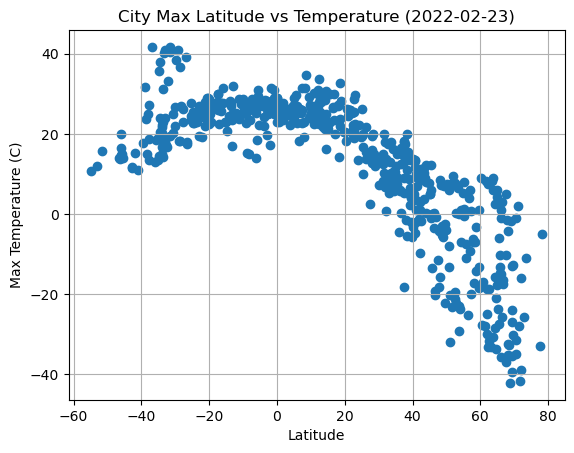

In [76]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-02-23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

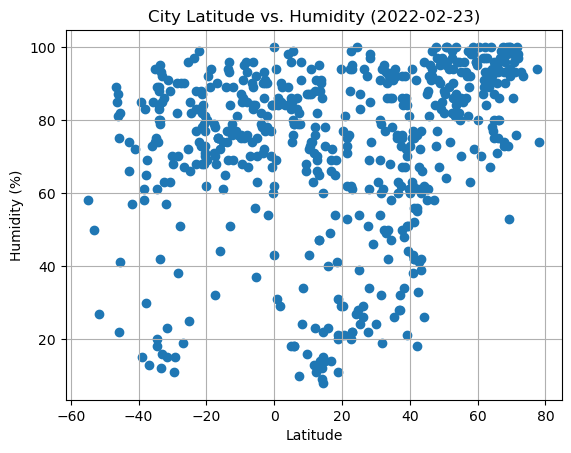

In [77]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-02-23)")
plt.grid(True)
# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

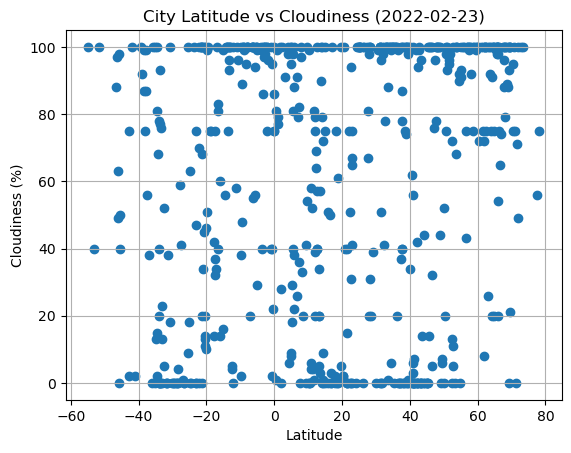

In [78]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-02-23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

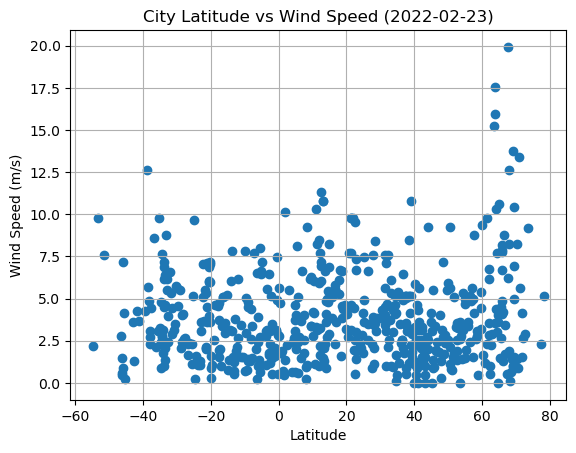

In [79]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-02-23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [121]:
# Define a function to create Linear Regression plots
def hemi_data_regression(x_value, y_values, title, y_label, text_coordinates):
    
    #Run the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # PLot scatter plot
    plt.scatter(x_values, y_values)
    
    #Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red") 
    
    #Print the r square value
    print(f"The r-value: {rvalue**2}")
    # Show Plot
    plt.show()


In [122]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ayan,56.4500,138.1667,-25.13,86,43,2.40,RU,1676232584
1,shingu,33.7333,135.9833,10.34,92,100,0.94,JP,1676232585
2,deputatskiy,69.3000,139.9000,-39.30,100,93,0.98,RU,1676232585
3,kavaratti,10.5669,72.6420,26.63,73,0,4.13,IN,1676232586
4,shelburne,44.0787,-80.2041,0.23,96,44,2.56,CA,1676232587


In [123]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,morondava,-20.2833,44.2833,26.85,81,100,5.96,MG,1676232587
8,mudgee,-32.5943,149.5871,17.10,86,52,2.41,AU,1676232589
9,ambilobe,-13.2000,49.0500,23.35,93,96,0.71,MG,1676232589
10,mataura,-46.1927,168.8643,14.03,87,49,0.47,NZ,1676232557
11,bluff,-46.6000,168.3333,13.92,89,88,2.81,NZ,1676232462


###  Temperature vs. Latitude Linear Regression Plot

The r-value: 0.7382769883497359


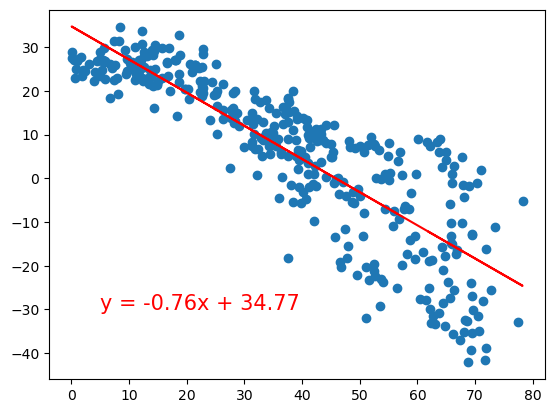

In [130]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call Function
hemi_data_regression(x_values, y_values, "Latitude vs Max Temp"  ,"Max Temp", (5,-30))

The r-value: 0.12594247300674333


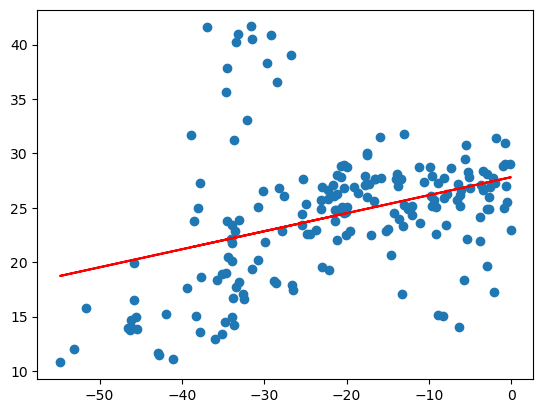

In [137]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call Function
hemi_data_regression(x_values, y_values, "Latitude vs Max Temp"  ,"Max Temp", (-45,45))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value: 0.1636176015028532


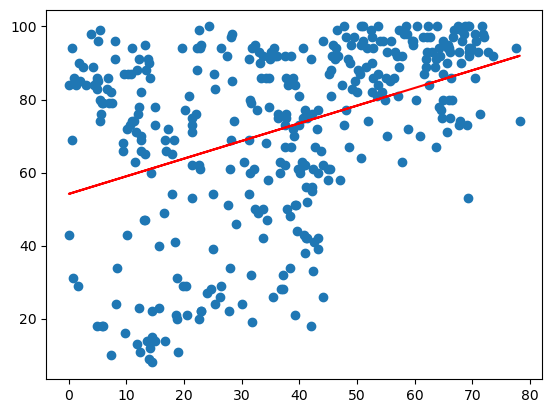

In [138]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call Function
hemi_data_regression(x_values, y_values, "Latitude vs Max Temp"  ,"Humidity", (5,-30))

The r-value: 0.09151887837382368


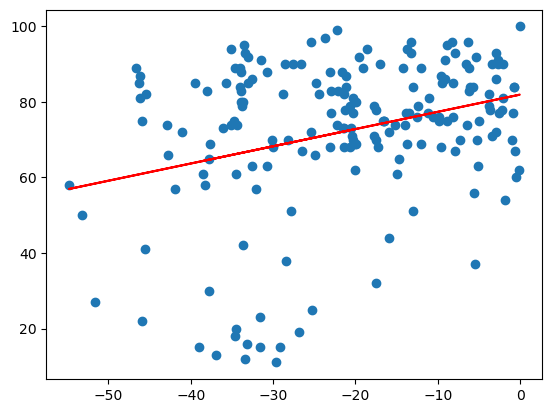

In [139]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call Function
hemi_data_regression(x_values, y_values, "Latitude vs Max Temp"  ,"Humidity", (5,-30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value: 0.06287111308366143


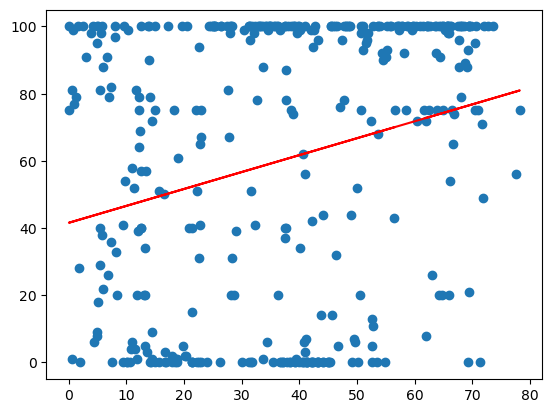

In [140]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call Function
hemi_data_regression(x_values, y_values, "Latitude vs Max Temp"  ,"Cloudiness", (5,-30))

The r-value: 0.09378720426903175


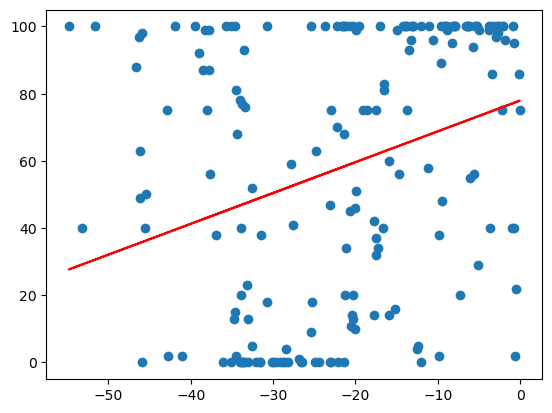

In [141]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call Function
hemi_data_regression(x_values, y_values, "Latitude vs Max Temp"  ,"Cloudiness", (5,-30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call Function
hemi_data_regression(x_values, y_values, "Latitude vs Max Temp"  ,"Wind Speed", (5,-30))

The r-value: 0.024924533870937834


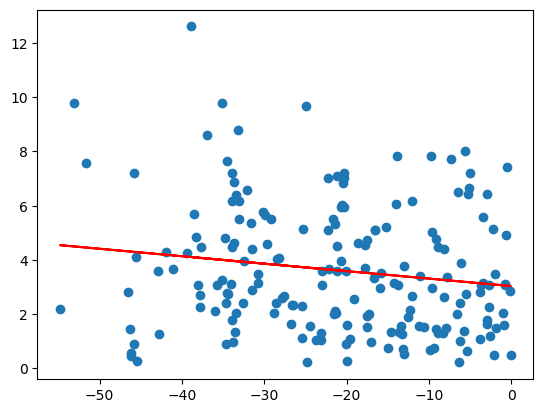

In [142]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call Function
hemi_data_regression(x_values, y_values, "Latitude vs Max Temp"  ,"Wind Speed", (5,-30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE